In [1]:
import numpy as np
import matplotlib.pyplot as plt

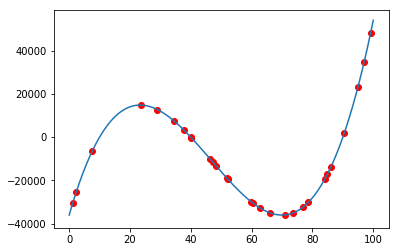

In [27]:
# We create some data
x = np.linspace(start=0, stop=100, num=1000)
y = np.array([ (i-10)*(i-40)*(i-90) for i in x])

expected = np.column_stack([x,y])

dataset  = np.copy(expected)
np.random.shuffle(dataset)
dataset = dataset[:30]

plt.plot(expected[:,0], expected[:,1])
plt.scatter(dataset[:,0], dataset[:,1], c="r")

In [64]:
# We implement the algorithm
def dwnn(dataset, query, sigma=0.5):
    query = np.array(query)
    
    # Calculate distances from query point
    distances = np.array([ np.linalg.norm(point[:-1] - query) for point in dataset ])
    
    # Apply the weight function
    for i in range(distances.size):
        distances[i] = np.exp(-distances[i]**2 / (2*sigma**2))
    
    # Predict the class
    cls = np.sum(np.multiply(dataset[:,-1], distances)) / np.sum(distances)
    return cls

dwnn(dataset, 39)

674.0410909722286

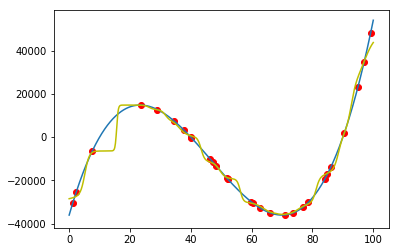

In [72]:
# Now we predict the expected set
prediction = np.array([ dwnn(dataset, point[:-1], sigma=2) for point in expected ])

plt.plot(expected[:,0], expected[:,1])
plt.scatter(dataset[:,0], dataset[:,1], c="r")
plt.plot(expected[:,0], prediction, c="y")

It seems that this works best if the train points are evenly scattered in the x-axis.

Points concentrated in the same place, or places with few points, both situations seem to impact on dwnn's usefulness.